In [2]:
import vk

In [3]:
token = "da1d3ad9da1d3ad9da1d3ad92fda6ec5a3dda1dda1d3ad98578c23a330679a6154732d7"  
session = vk.Session(access_token=token)
vk_api = vk.API(session)

In [4]:
personal_token = "a1bb549a38cfb3cb364713348b6e875b9d8a6c3552e33ef5a91f18a9e3198920ca3995c778796989609b5"
session = vk.Session(access_token=personal_token) 
vk_personal_api = vk.API(session)

In [5]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92) 
    data = first["items"] 
    count = first["count"] // 1000 
    
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [6]:
members = get_members ("ored_recordings") 

In [7]:
len (members)

7285

In [8]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"]
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3: 
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-") 
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [9]:
save_members_to_file ("members_vk_groups_ored.tsv", members)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd

df = pd.read_csv("members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [12]:
df.head(100)

,id,name,surname,sex,birth,city,country
0,"3371,",Mukhamed,Buzdov,M,-,-,-
1,"4387,",Stas,Didenko,M,-,Saint Petersburg,Russia
2,"5199,",Maria,Kuzmina,F,-,Saint Petersburg,Russia
3,"6612,",Alexander,Zakhkin,M,-,Saint Petersburg,Russia
4,"6873,",Yulia,Krishneva,F,-,-,-
...,...,...,...,...,...,...,...
95,"281954,",Evgeny,Vikki,M,-,Saint Petersburg,Russia
96,"286241,",Olya,Goryachaya,F,1993,Saint Petersburg,Russia
97,"286789,",Lesya,Baranova,F,-,Saint Petersburg,Russia
98,"289528,",Anzhelika,Melika,F,-,Moscow,Russia


In [13]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:30]

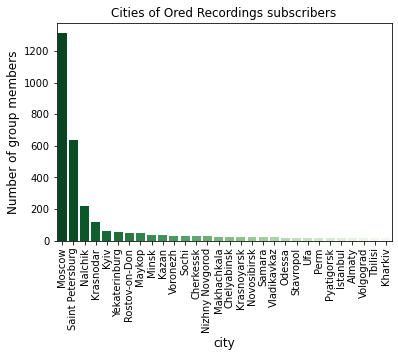

In [14]:
sns.barplot(city_count.index, city_count.values, palette='Greens_r') 
plt.title('Cities of Ored Recordings subscribers')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

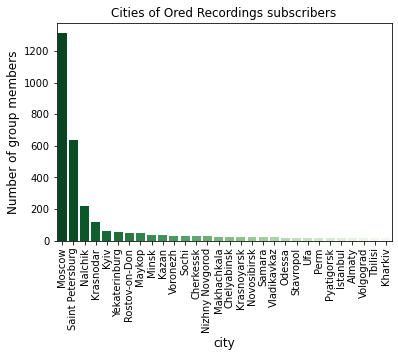

In [15]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:30]

sns.barplot(city_count.index, city_count.values, palette='Greens_r') 
plt.title('Cities of Ored Recordings subscribers')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

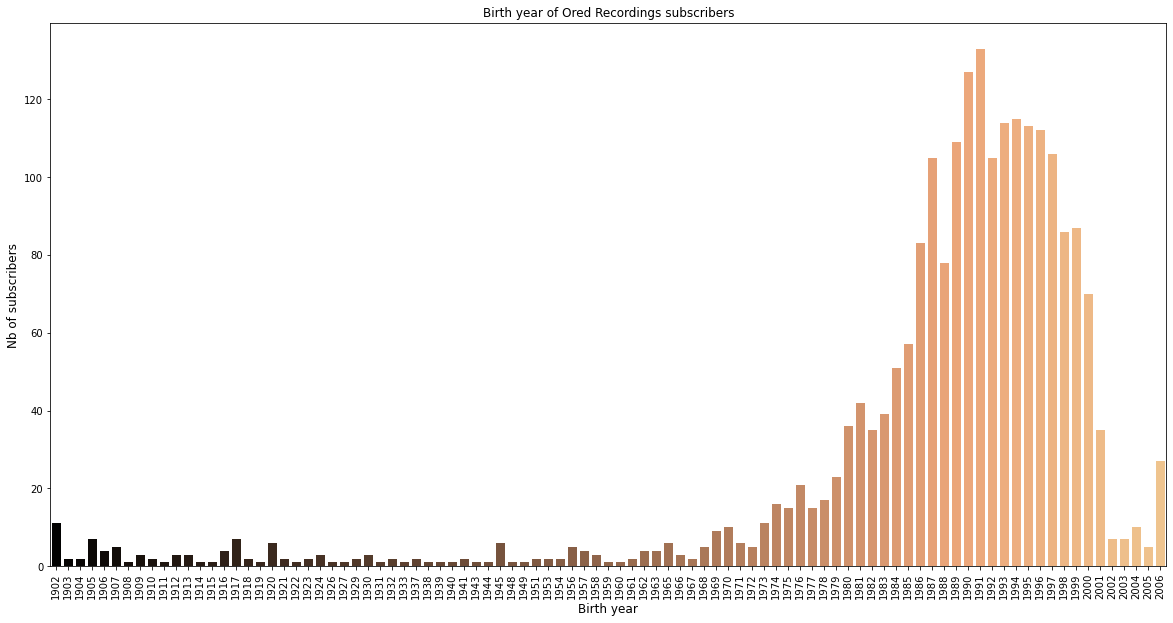

In [16]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of Ored Recordings subscribers')
plt.ylabel('Nb of subscribers', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

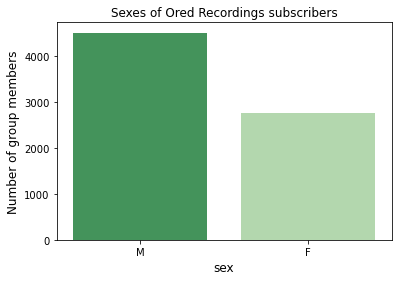

In [17]:
sex_count  = df['sex'].value_counts().drop('-') 
sex_count = sex_count[:2]

sns.barplot(sex_count.index, sex_count.values, palette='Greens_r') 
plt.title('Sexes of Ored Recordings subscribers')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('sex', fontsize=12)
plt.xticks(rotation=360) 
plt.show() 

In [ ]:
df 